In [63]:
import numpy as np
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd
import csv
from pathlib import Path
import os

In [64]:
# adding average HFO duration as another column in participants

# change this function to change the dependent variable (e.g. duration, count. etc.)
def avgduration(subjn, runn):
    subjectfile = f'dataset/derivatives/sub-{subjn}/ses-01/eeg/sub-{subjn}_ses-01_task-hfo_run-0{runn}_events.tsv'
    df = pd.read_csv(subjectfile, sep='\t', header=0)
    return df.loc[:, 'indDuration'].mean()

nine = ['01', '02', '03', '04', '05', '06', '07', '08', '09']
avgdurations = [] #rename this according to what variable you're looking at
for subj in nine:
    avg = 0
    count = 0
    for i in range(1, 19):
        if (os.path.exists(f'dataset/derivatives/sub-{subj}/ses-01/eeg/sub-{subj}_ses-01_task-hfo_run-0{i}_events.tsv')):
            try:
                avg = avg + avgduration(subj, i) #change "avgduration" to match function above
                count = count + 1
            except:
                continue
    if (count != 0):
        avg = avg / count
    avgdurations.append(int(avg)) #rename this to match array above

for subj in range(10, 31):
    avg = 0
    count = 0
    for i in range(1, 19):
        if (os.path.exists(f'dataset/derivatives/sub-{subj}/ses-01/eeg/sub-{subj}_ses-01_task-hfo_run-0{i}_events.tsv')):
            try:
                avg = avg + avgduration(subj, i) #change this to match function above
                count = count + 1
            except:
                continue
    if (count != 0):
        avg = avg / count
    avgdurations.append(int(avg)) #rename this to match array above

participants = pd.read_csv('dataset/participants.tsv', sep='\t', header=0)
participants['HFODuration'] = avgdurations #rename this to whatever variable you're looking at + the array, be sure to stack (see count vs. age below)
participants.to_csv('participants.csv', index=False)
participants = pd.read_csv('participants.csv')



In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

# Duration vs. Age

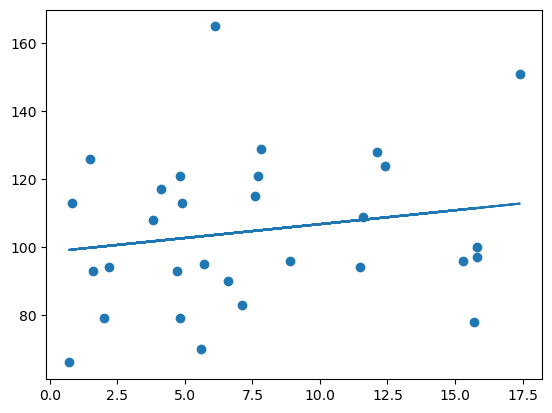

R² = 0.0325


In [66]:
#regression graph of duration vs. age
x = participants['age'] #independent variable, change this depending on what you're looking at
y = participants['HFODuration'] #dependent variable, change 

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))


plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# r^2

x = np.array([float(num) for num in x]).reshape(-1, 1)
y = [float(num) for num in y]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
# Calculate R^2
r_squared = r2_score(y, y_pred)
print(f"R² = {r_squared:.4f}")

# Duration vs. Sex

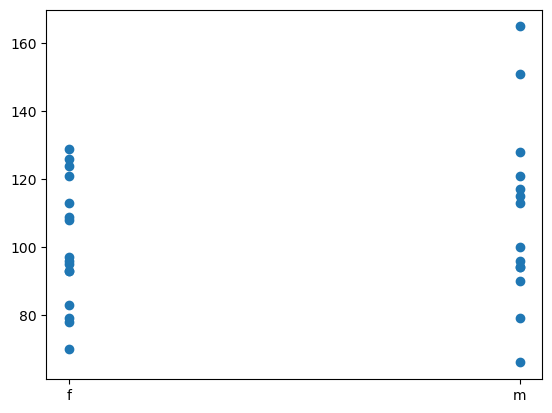

In [67]:
#regression graph of duration vs. sex

import matplotlib.pyplot as plt
from scipy import stats

x = participants['sex']
y = participants['HFODuration']

plt.scatter(x, y)
plt.show()

# Count vs Age

In [68]:
def hfocount(subjn, runn):
    subjectfile = f'dataset/derivatives/sub-{subjn}/ses-01/eeg/sub-{subjn}_ses-01_task-hfo_run-0{runn}_events.tsv'
    df = pd.read_csv(subjectfile, sep='\t', header=0)
    return df['nChannel'].count()

nine = ['01', '02', '03', '04', '05', '06', '07', '08', '09']
hfocounts = []
for subj in nine:
    avg = 0
    count = 0
    for i in range(1, 19):
        if (os.path.exists(f'dataset/derivatives/sub-{subj}/ses-01/eeg/sub-{subj}_ses-01_task-hfo_run-0{i}_events.tsv')):
            try:
                avg = avg + hfocount(subj, i)
                count = count + 1
            except:
                continue
    if (count != 0):
        avg = avg / count
    hfocounts.append(int(avg))

for subj in range(10, 31):
    avg = 0
    count = 0
    for i in range(1, 19):
        if (os.path.exists(f'dataset/derivatives/sub-{subj}/ses-01/eeg/sub-{subj}_ses-01_task-hfo_run-0{i}_events.tsv')):
            try:
                avg = avg + hfocount(subj, i)
                count = count + 1
            except:
                continue
    if (count != 0):
        avg = avg / count
    hfocounts.append(int(avg))

participants = pd.read_csv('dataset/participants.tsv', sep='\t', header=0)
participants['HFODuration'] = avgdurations #be sure to stack!!
participants['hfocount'] = hfocounts
participants.to_csv('participants.csv', index=False)
participants = pd.read_csv('participants.csv')

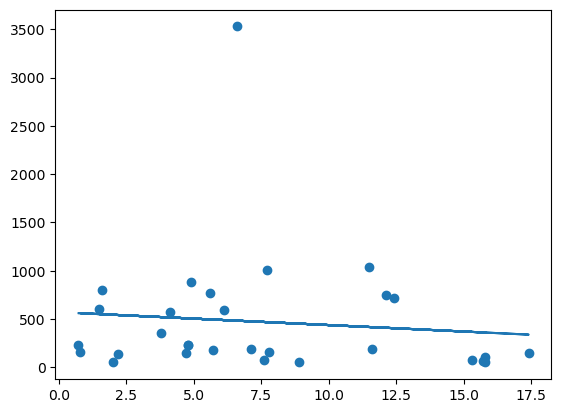

R² = 0.0103


In [69]:
x = participants['age']
y = participants['hfocount']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))


plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# r^2

x = np.array([float(num) for num in x]).reshape(-1, 1)
y = [float(num) for num in y]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
# Calculate R^2
r_squared = r2_score(y, y_pred)
print(f"R² = {r_squared:.4f}")